# Summer Olympic Data Analysis

#### Importing the required libraries to work on the dataset

In [1]:
# pd, np, plt & sns are just short names assigned so that we dont need to write full names again & again.
import pandas as pd
import matplotlib.pyplot as pit

In [3]:
df = pd.read_csv("summer.csv")

In [4]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


### 1. In how many cities Summer Olympics is held so far?

The unique() is used to get unique values & the len() returns the length.

In [5]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

-> For splitting a data into groups, groupby() is used and to compute a summary statistic about each group, agg() is used which returns a single aggregated value for each group.

-> Reset_index helps in resetting the index of the dataframe object to default indexing (0 to number of rows minus 1) or we can say to reset multi level index. By doing so, the original index gets converted to a column.

-> Here, Sort_values() sorts a data frame in Descending order of passed Column by assigning "False" in Ascending order.

-> Inplace = True means the data is modified in that place & will return nothing because now the dataframe is updated.

-> Head() is used to return (Top 5 by default) rows of a dataframe.

-> Sns Barplot shows point estimates and confidence intervals as rectangular bars. It helps in better visualization

10486
         Sport  Gold Medal
0     Aquatics        1421
1    Athletics        1215
17      Rowing         890
4   Gymnastics         820
3      Fencing         552


<AxesSubplot:xlabel='Sport'>

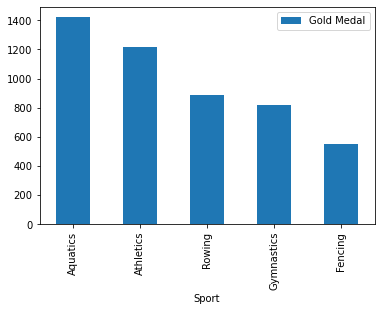

In [59]:
df1 = df[df['Medal']=='Gold']
data = []
for sport in df1['Sport'].unique():
  data.append([sport, len(df1[df1['Sport']==sport])])
data = pd.DataFrame(data, columns=['Sport','Gold Medal'])
print(len(df1['Medal']))
data = data.sort_values(by = 'Gold Medal', ascending=False).head()
print(data.head())
data.plot(x = 'Sport', y = 'Gold Medal', kind = 'bar')

### 3. Which sport is having most number of medals so far? (Top 5)

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Sport'>

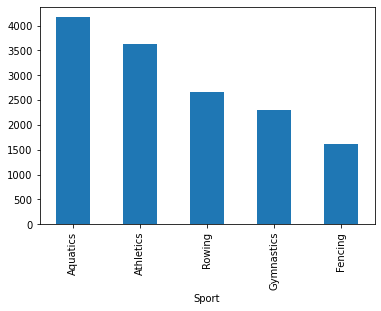

In [60]:
df2=df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head()
print(df2)
df2.plot.bar()

### 4. Which player has won most number of medals? (Top 5)

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Athlete'>

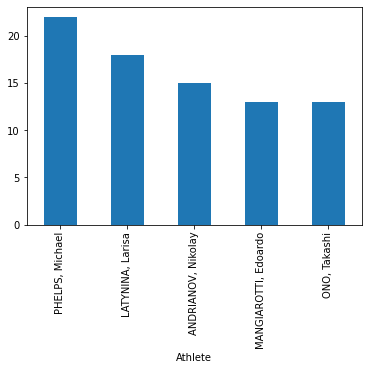

In [61]:
df2=df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head()
print(df2)
df2.plot.bar()

### 5. Which player has won most number Gold Medals of medals? (Top 5)

Athlete
PHELPS, Michael     18
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Athlete'>

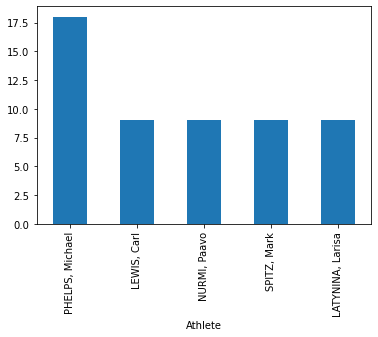

In [62]:
df2 = df1.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()
print(df2)
df2.plot.bar()

### 6. In which year India won first Gold Medal in Summer Olympics?

In [63]:
df2=df1.sort_values(by='Year', ascending=True)
df2[df2['Country']=='IND']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold
5517,1928,Amsterdam,Hockey,Hockey,"HAMMOND, Leslie Charles",IND,Men,Hockey,Gold
...,...,...,...,...,...,...,...,...,...
16091,1980,Moscow,Hockey,Hockey,"DEAVINDER, Singh",IND,Men,Hockey,Gold
16090,1980,Moscow,Hockey,Hockey,"CHETTRI, Chettri",IND,Men,Hockey,Gold
16100,1980,Moscow,Hockey,Hockey,"SURINDER, Singh",IND,Men,Hockey,Gold
16087,1980,Moscow,Hockey,Hockey,"ALLAN, Schofield",IND,Men,Hockey,Gold


### 7. Which event is most popular in terms on number of players? (Top 5)

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64


<AxesSubplot:xlabel='Event'>

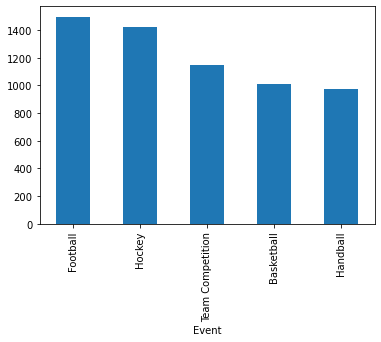

In [64]:
df2=df.groupby('Event').count()['Athlete'].sort_values(ascending=False).head()
print(df2)
df2.plot.bar()

### 8. Which sport is having most female Gold Medalists? (Top 5)

10486
         Sport  Female Gold Medalist
4     Aquatics                   589
7    Athletics                   389
8   Gymnastics                   268
14      Rowing                   217
11  Volleyball                   166


10486

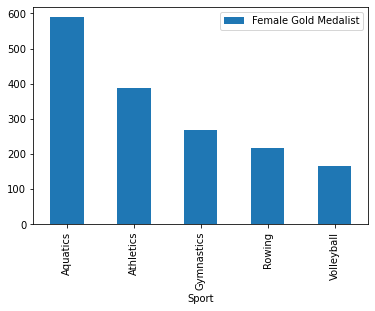

In [65]:
df2 = df1[df1['Gender'] == 'Women']
data = []
for sport in df2['Sport'].unique():
  data.append([sport, len(df2[df2['Sport'] == sport])])
data = pd.DataFrame(data, columns=['Sport','Female Gold Medalist'])
print(len(df1['Sport']))
data = data.sort_values(by = 'Female Gold Medalist', ascending=False).head()
print(data.head())
data.plot(x = 'Sport', y = 'Female Gold Medalist', kind = 'bar')
10486